In [24]:
import pdfplumber

In [6]:
with pdfplumber.open('Santander - FII.pdf') as pdf:
    page = pdf.pages[0]
    all_text = ''
    text = page.extract_text()
    for row in text:
        all_text += text
    row = all_text.split('\n')

In [7]:
    nota = row[3].split()
    obj_nota = {
        "Numero da Pagina": row[0],
        "Data Pregão": nota[0],
        "N_Nota": nota[1]
    }
    #print(obj_nota)

In [8]:
    linha5 = row[5].split()
    num_endereco = 0
    endereco = ''
    while num_endereco <= len(linha5) - 3:
        endereco += f"{linha5[num_endereco]} "
        num_endereco += 1
       
    telefone = row[6].split()
    
    obj_corretora = {
        "Nome da Corretora": row[4],
        "Endereco": endereco,
        "CEP": linha5[-1],
        "Telefone_Capitais_e_regições_metropolitanas": f"{telefone[0]} {telefone[1][0]}{telefone[1][1]}{telefone[1][2]}{telefone[1][3]}",
        "Telefone_Demais_Localidades": f"{telefone[5]} {telefone[6]} {telefone[7][0]}{telefone[7][1]}{telefone[7][2]}{telefone[7][3]}",
        "Telefone_Pessoas_com_deficiencia": f"{telefone[-3]} {telefone[-2]} {telefone[-1][0]}{telefone[-1][1]}{telefone[-1][2]}{telefone[-1][3]}",
        "Site": row[8],
        "CNPJ": row[9]
    }
    print(obj_corretora)

{'Nome da Corretora': 'SANTANDER CORRETORA DE CÂMBIO E VALORES MOBILIÁRIOS S.A', 'Endereco': 'AV. JUSCELINO KUBITSCHEK, 2041 / 2235 -24° ANDAR -SÃO PAULO -SP ', 'CEP': '04543-011', 'Telefone_Capitais_e_regições_metropolitanas': '4004 3535', 'Telefone_Demais_Localidades': '0800 702 3535', 'Telefone_Pessoas_com_deficiencia': '0800 723 5007', 'Site': 'WWW.SANTANDERCORRETORA.COM.BR', 'CNPJ': '51.014.223/0001-49'}


{'Número do Cliente': '614218-1', 'Nome': 'SERGIO CARLOS PANIGASSI', 'Endereço': 'R TOME DE SOUSA, 100 -AP 121 -CENTRO (011) 4368-6579 09710-240 -SAO BERNARDO DO CAMPO-SP', 'CPF_CNPJ_CVM_COB': '054.238.648-87', 'Codigo Cliente': '614218-1', 'Assessor': '15'}


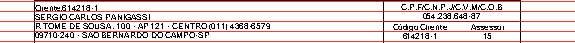

In [9]:
    coluna_cliente = page.crop((20, 200, page.width, 243))
    cliente_settings = {
        "vertical_strategy": "lines",
        "horizontal_strategy": "explicit",
        "explicit_horizontal_lines": [201, 211, 221, 231, 241]
    }
    table_cliente = coluna_cliente.extract_table(cliente_settings)
    num_cliente = table_cliente[0][1].split('Cliente:')
    info_cliente = table_cliente[3][2].split()
    
    
    obj_cliente = {
        "Número do Cliente": num_cliente[-1],
        "Nome": table_cliente[1][1],
        "Endereço": f"{table_cliente[2][1]} {table_cliente[3][1]}",
        "CPF_CNPJ_CVM_COB": table_cliente[1][2],
        "Codigo Cliente": info_cliente[0],
        "Assessor": info_cliente[1]
    }
    print(obj_cliente)
im = coluna_cliente.to_image()
im.draw_vlines([])
im.draw_hlines([201, 211, 221, 231, 241])

{'Agente_de_compensação': '', 'Cliente': '614218-1', 'Valor': '528,45', 'Custodiante': '', 'Banco': '033', 'Agencia': '1760', 'Conta_Corrente': '1002281-8', 'Acionista': '', 'Administrador': '', 'Complemento_Nome': ''}


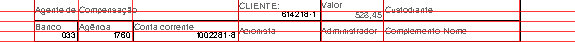

In [10]:
    coluna_banco = page.crop((20, 244, page.width, 286))
    banco_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_horizontal_lines": [255, 260, 277, 285],
        "explicit_vertical_lines": [54, 98, 152, 258, 341, 403, 540]
    }
    table_banco = coluna_banco.extract_table(banco_settings)

    obj_banco = {
        "Agente_de_compensação": table_banco[1][2],
        "Cliente": table_banco[1][3],
        "Valor": table_banco[1][4],
        "Custodiante": table_banco[1][5],
        "Banco": table_banco[4][0],
        "Agencia": table_banco[4][1],
        "Conta_Corrente": table_banco[4][2],
        "Acionista": table_banco[4][3],
        "Administrador": table_banco[4][4],
        "Complemento_Nome": table_banco[4][5]
    }
    print(obj_banco)
im = coluna_banco.to_image()
im.draw_hlines([255 , 265, 275, 285])
im.draw_vlines([54, 98, 152, 258, 341, 403, 539])

{'Negocio_1': {'Negociacao': '1-BOVESPA', 'C_V': 'V', 'Tipo_de_Mercado': 'VISTA', 'Especificacao_do_Titulo': 'THRA11', 'obs_asterisco': '', 'Quantidade': '10', 'Preco_Ajuste': '149,14', 'Valor_Ajuste': '1.491,40', 'D_C': 'C'}, 'Negocio_2': {'Negociacao': '1-BOVESPA', 'C_V': 'V', 'Tipo_de_Mercado': 'VISTA', 'Especificacao_do_Titulo': 'TBOF11', 'obs_asterisco': '', 'Quantidade': '294', 'Preco_Ajuste': '100,30', 'Valor_Ajuste': '29.488,20', 'D_C': 'C'}, 'Negocio_3': {'Negociacao': '1-BOVESPA', 'C_V': 'V', 'Tipo_de_Mercado': 'VISTA', 'Especificacao_do_Titulo': 'SDIL11', 'obs_asterisco': '', 'Quantidade': '75', 'Preco_Ajuste': '115,35', 'Valor_Ajuste': '8.651,25', 'D_C': 'C'}, 'Negocio_4': {'Negociacao': '1-BOVESPA', 'C_V': 'V', 'Tipo_de_Mercado': 'VISTA', 'Especificacao_do_Titulo': 'THRA11', 'obs_asterisco': '', 'Quantidade': '10', 'Preco_Ajuste': '149,14', 'Valor_Ajuste': '1.491,40', 'D_C': 'C'}, 'Negocio_5': {'Negociacao': '1-BOVESPA', 'C_V': 'V', 'Tipo_de_Mercado': 'VISTA', 'Especificac

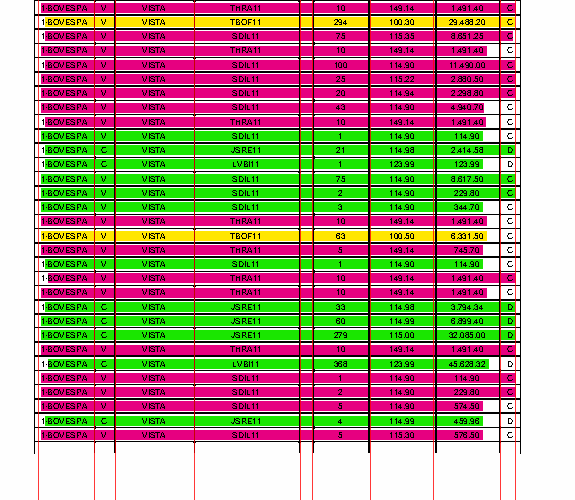

In [11]:
    coluna_negocios = page.crop((20, 330, page.width, 830))
    negocios_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [58, 114, 135, 214, 320, 332, 390, 453, 520, 535]
    }
    table_negocios = coluna_negocios.extract_table(negocios_settings)
    
    num_negociacao = 0
    total_negocios = {}
    while num_negociacao <= len(table_negocios) -2:
        negocio_num = num_negociacao + 1
        negocio = {
            "Negociacao": table_negocios[num_negociacao][0],
            "C_V": table_negocios[num_negociacao][1],
            "Tipo_de_Mercado": table_negocios[num_negociacao][2],
            "Especificacao_do_Titulo": table_negocios[num_negociacao][3],
            "obs_asterisco": table_negocios[num_negociacao][4],
            "Quantidade": table_negocios[num_negociacao][5],
            "Preco_Ajuste": table_negocios[num_negociacao][6],
            "Valor_Ajuste": table_negocios[num_negociacao][7],
            "D_C": table_negocios[num_negociacao][8]
        }
        total_negocios[f"Negocio_{negocio_num}"] = negocio
        num_negociacao += 1
    print(total_negocios)
    
im = coluna_negocios.to_image()
im.draw_vlines([58, 114 ,135, 214, 320, 332, 390, 453, 520, 535])

In [25]:
with pdfplumber.open('Santander - FII.pdf') as pdf:
    page2 = pdf.pages[1]
    coluna_negocios2 = page2.crop((20, 50, page.width, 75))
    negocios2_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [58, 114, 135, 214, 320, 332, 390, 453, 520, 535]
    }
    table_negocios2 = coluna_negocios2.extract_table(negocios2_settings)
    print(table_negocios2)
    all_text = ''
    text = page2.extract_text()
    for row in text:
        all_text += text
    row = all_text.split('\n')
    
im = coluna_negocios2.to_image()
im.draw_vlines([58, 114, 135, 214, 320, 332, 390, 453, 520, 535])

[['1-BOVESPA', 'V', 'VISTA', 'SDIL11', '', '32', '115,38', '3.692,16', 'C']]


['IRRF', 'Day', 'Trade:0,00', 'Projeção:', '0,00']
0,00
{'Vendas a vista': '91.876,11', 'Compras a vista': '91.405,59', 'Opcoes_Compra': '0,00', 'Opcoes_Vendas': '0,00', 'Operacoes a Termo': '0,00', 'Valor das Operacoes com Titulos Publicos V_Nom': '0,00', 'Valor das Operacoes': '183.281,70', 'Especificações Diversas': {'IRRF_Day_Trade': '0,00', 'Projeção': '0,00'}}


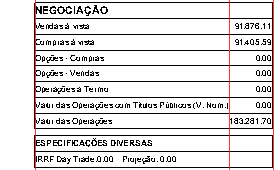

In [26]:
    coluna_negociacao = page2.crop((20, 80, 300, 250))
    negociacao_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [55, 249, 293]
    }
    table_negociacao = coluna_negociacao.extract_table(negociacao_settings)
    especificacao = row[-14].split()
    irrf = ''
    num_caractere = 6
    while num_caractere <= len(especificacao[2]) - 1:
        irrf += f"{especificacao[2][num_caractere]}"
        num_caractere += 1
    print(especificacao)
    print(irrf)
    negociacao = {
        "Vendas a vista": table_negociacao[1][1],
        "Compras a vista": table_negociacao[2][1],
        "Opcoes_Compra": table_negociacao[3][1],
        "Opcoes_Vendas": table_negociacao[4][1],
        "Operacoes a Termo": table_negociacao[5][1],
        "Valor das Operacoes com Titulos Publicos V_Nom": table_negociacao[6][1],
        "Valor das Operacoes": table_negociacao[7][1],
        "Especificações Diversas": {
            "IRRF_Day_Trade": irrf,
            "Projeção": especificacao[-1]
        }
    }
    print(negociacao)
    
im = coluna_negociacao.to_image()
im.draw_vlines([55, 249, 293])
im.draw_hlines([])

{'Dados8': '8 -Liquidação Institucional', 'Dados_D': 'D -Day-Trade', 'Dados_F': 'F -Cobertura', 'Dados_B': 'B -Debêntures', 'Dados_C': 'C -Clubes e Fundos de Ações', 'Dados_A': 'A-Posição Futuro', 'Dados_H': 'H -Home Broker', 'Dados_X': 'X -Box', 'Dados_P': 'P -Carteira Própria', 'Dados_Y': 'Y -Desmanche de Box', 'Dados_L': 'L -Precatório', 'Dados_T': 'T -Liquidação pelo Bruto'}


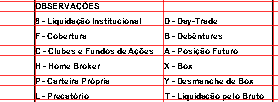

In [27]:
    coluna_obs = page2.crop((20, 255, 298, 357))
    obs_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [55, 183, 293],
        "explicit_horizontal_lines": [256, 266, 280, 300, 310, 330, 340, 354]
    }
    table_obs = coluna_obs.extract_table(obs_settings)
    obs = {
        "Dados8":  table_obs[1][0],
        "Dados_D": table_obs[1][1],
        "Dados_F": table_obs[2][0],
        "Dados_B": table_obs[2][1],
        "Dados_C": table_obs[3][0],
        "Dados_A": table_obs[3][1], 
        "Dados_H": table_obs[4][0],
        "Dados_X": table_obs[4][1],
        "Dados_P": table_obs[5][0],
        "Dados_Y": table_obs[5][1],
        "Dados_L": table_obs[6][0],
        "Dados_T": table_obs[6][1]
    }
    print(obs)
im = coluna_obs.to_image()
im.draw_vlines([55, 183, 293])
im.draw_hlines([256, 266, 280, 300, 310, 330, 340, 354])

[['RESUMO FINANCEIRO', '', 'D/C'], ['CBLC', '', ''], ['Valor Líquido das Operações', '470,52', 'C'], ['Taxa de Liquidação', '50,40', 'D'], ['Taxa de Registro', '0,00', ''], ['Total CBLC', '420,12', 'C'], ['', '', ''], ['BOVESPA/SOMA', '', ''], ['Taxa de Termo / Opções', '0,00', ''], ['Taxa A.N.A.', '0,00', ''], ['Emolumentos', '6,96', 'D'], ['Total Bovespa / Soma', '6,96', 'D'], ['', '', ''], ['CORRETAGEM / DESPESAS', '', ''], ['Corretagem', '941,61', 'D'], ['ISS (SÃO PAULO)', '47,08', ''], ['I.R.R.F. s/ operações. Base R$ 91.876,11', '4,59', 'D'], ['Outras', '0,00', ''], ['Líquido para 05/12/2019', '528,45', 'D'], ['', '', '']]
{'Corretagem': {'Valor': '941,61', 'DC': 'D'}, 'ISS (SÃO PAULO)': {'Valor': '47,08 ', 'DC': ''}, 'I.R.R.F. s/ operações. Base R$ 91.876,11': {'Valor': '4,59D', 'DC': ''}, 'Outras': {'Valor': '0,00', 'DC': ''}, 'Líquido para 05/12/2019': {'Valor': '528,45', 'DC': 'D'}}


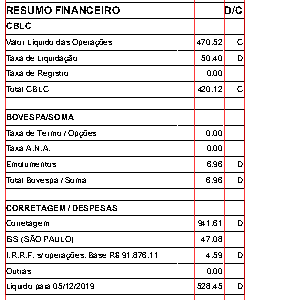

In [38]:
    coluna_resumo = page2.crop((296, 80, page.width, 380))
    resumo_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [301, 490, 520, 540]
    }
    table_resumo = coluna_resumo.extract_table(resumo_settings)
    print(table_resumo)
    
    resumo_financeiro = {
        "CBLC": {
            "Valor": table_resumo[1][-2],
            "DC": table_resumo[1][-1]
        },
        "Valor Líquido das Operacões": {
            "Valor": table_resumo[2][-2],
            "DC": table_resumo[2][-1]
        },
        "Taxa de Liquidação": {
            "Valor": table_resumo[3][-2],
            "DC": table_resumo[3][-1]
        },
        "Taxa de Registro": {
            "Valor": table_resumo[4][-2],
            "DC": table_resumo[4][-1]
        },
        "Total CBLC": {
            "Valor": table_resumo[5][-2],
            "DC": table_resumo[5][-1]
        }
    }
    
    obj_bovespa = {
        "Taxa de Termo_Opções": {
            "Valor": table_resumo[8][-2],
            "DC": table_resumo[8][-1]
        },
        "Taxa_ANA": {
            "Valor": table_resumo[9][-2],
            "DC": table_resumo[9][-1]
        },
        "Emolumentos": {
            "Valor": table_resumo[10][-2],
            "DC": table_resumo[10][-1]
        },
        "Total_Bovespa_Soma": {
            "Valor": table_resumo[11][-2],
            "DC": table_resumo[11][-1]
        }
    }
    
    obj_despesas = {
        table_resumo[14][0]: {
            "Valor": table_resumo[14][-2],
            "DC": table_resumo[14][-1]
        },
        table_resumo[15][0]: {
            "Valor": f"{table_resumo[15][-2]} {table_resumo[15][-1]}",
            "DC": ''
        },
        table_resumo[16][0]: {
            "Valor": f"{table_resumo[16][-2]}{table_resumo[16][-1]}",
            "DC": ''
        },
        table_resumo[17][0]: {
            "Valor": table_resumo[17][-2],
            "DC": table_resumo[17][-1]
        },
        table_resumo[18][0]: {
            "Valor": table_resumo[18][-2],
            "DC": table_resumo[18][-1]
        }
    }
    print(obj_despesas)
im = coluna_resumo.to_image()
im.draw_vlines([301, 490, 520, 540])
im.draw_hlines([])

In [39]:
    print(row[-4])
    print(row[-3])
    print(row[-2])
    

As operações a termo não são computadas no Líquido para 05/12/2019 528,45 D
líquido da fatura.
DayTrade-IR 1% na Fonte
